Consider the SMS dataset from provided dataset and Classify the data using LSTM

 (Resources:
https://medium.com/mlearning-ai/the-classification-of-text-messages-using-lstm-bi-lstm-and-gru-f79b207f90ad

Dataset: https://www.kaggle.com/datasets/shravan3273/sms-spam)

In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('sms_dataset.csv')
df = df[['type','text']]
df.rename(columns={'v1':'type', 'v2':'text'}, inplace=True)
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [ ]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


In [ ]:
df.groupby('type').describe().T

type                            ham  \
text count                     4812   
     unique                    4503   
     top     Sorry, I'll call later   
     freq                        30   

type                                                      spam  
text count                                                 747  
     unique                                                653  
     top     Please call our customer service representativ...  
     freq                                                    4

In [ ]:
df.isnull().sum()

type    0
text    0
dtype: int64

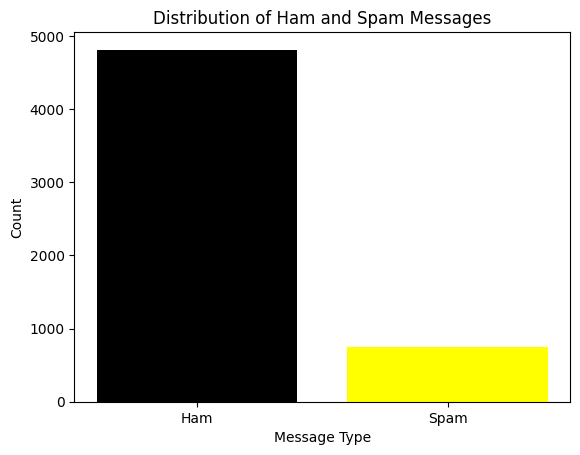

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
sms_data = pd.read_csv('sms_dataset.csv')
ham_count = sms_data[sms_data['type'] == 'ham'].shape[0]
spam_count = sms_data[sms_data['type'] == 'spam'].shape[0]
colors=["blue","red"]
labels = ['Ham', 'Spam']
counts = [ham_count, spam_count]
plt.bar(labels, counts,color=colors)
plt.xlabel('Message Type')
plt.ylabel('Count')
plt.title('Distribution of Ham and Spam Messages')
plt.show()

In [ ]:
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sms_data = pd.read_csv('sms_dataset.csv')

sms_messages = sms_data['text']
sms_labels = sms_data['type']

tokenizer = Tokenizer()
tokenizer.fit_on_texts(sms_messages)
sequences = tokenizer.texts_to_sequences(sms_messages)
maxlen = max(len(seq) for seq in sequences)
padded = pad_sequences(sequences, maxlen=maxlen)

sms_labels = [1 if label == 'spam' else 0 for label in sms_labels]


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(padded, sms_labels, test_size=0.2, random_state=42)
print(len(y_test))
print(len(X_train))

1112
4447


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=maxlen))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
from sklearn.model_selection import train_test_split
y_train = np.array(y_train)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
56/56 [==============================] - 32s 513ms/step - loss: 0.2346 - accuracy: 0.9247 - val_loss: 0.0576 - val_accuracy: 0.9820
Epoch 2/5
56/56 [==============================] - 30s 533ms/step - loss: 0.0364 - accuracy: 0.9885 - val_loss: 0.0814 - val_accuracy: 0.9708
Epoch 3/5
56/56 [==============================] - 29s 511ms/step - loss: 0.0156 - accuracy: 0.9963 - val_loss: 0.0505 - val_accuracy: 0.9899
Epoch 4/5
56/56 [==============================] - 33s 601ms/step - loss: 0.0068 - accuracy: 0.9989 - val_loss: 0.0457 - val_accuracy: 0.9876
Epoch 5/5
56/56 [==============================] - 29s 517ms/step - loss: 0.0024 - accuracy: 0.9997 - val_loss: 0.0487 - val_accuracy: 0.9899


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 189, 128)          1146112   
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 1277825 (4.87 MB)
Trainable params: 1277825 (4.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.save('sms_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from keras import models
model = models.load_model('sms_model.h5')
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sms_messages)
def classify_sms(text):
    sequences = tokenizer.texts_to_sequences(text)
    padded = pad_sequences(sequences, maxlen=maxlen)
    predictions = model.predict(padded)
    labels = [1 if p > 0.5 else 0 for p in predictions]
    return labels
predict_msg1 = "Awesome, I remember the last time we got somebody high for the first time with diesel :V"
predict_msg2 = "Amazon is sending you a refunding of $32.64. Please reply with your bank account and routing number to receive your refund."
sample_message_1 = "Congratulations! You've won a $1000 gift card! To claim your prize, click on the link below or call us at 555-123-4567. This is a limited-time offer, so act now!"
sample_message_2 = "Hi there! I hope you're having a great day. Would you like to meet up for coffee tomorrow afternoon?"
labels_0 = classify_sms([predict_msg1])
print(labels_0)
labels_1 = classify_sms([predict_msg2])
print(labels_1)
labels_2 = classify_sms([sample_message_1])
print(labels_2)
labels_3 = classify_sms([sample_message_2])
print(labels_3)
if labels_0[0] == 1:
    print("Predicted Class for Sample Message 1: spam")
else:
    print("Predicted Class for Sample Message 1: ham")
if labels_1[0] == 1:
    print("Predicted Class for Sample Message 1: spam")
else:
    print("Predicted Class for Sample Message 1: ham")

if labels_2[0] == 1:
    print("Predicted Class for Sample Message 2: spam")
else:
    print("Predicted Class for Sample Message 2: ham")

if labels_3[0] == 1:
    print("Predicted Class for Sample Message 2: spam")
else:
    print("Predicted Class for Sample Message 2: ham")

1/1 [==============================] - 1s 1s/step
[0]
1/1 [==============================] - 0s 74ms/step
[1]
1/1 [==============================] - 0s 86ms/step
[1]
1/1 [==============================] - 0s 87ms/step
[0]
Predicted Class for Sample Message 1: ham
Predicted Class for Sample Message 1: spam
Predicted Class for Sample Message 2: spam
Predicted Class for Sample Message 2: ham


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# True labels
true_labels = sms_labels  # Assuming sms_labels contains the true labels for all messages

# Predicted labels from the model
predicted_labels = classify_sms(sms_messages)

# Calculate precision, recall, and F1-score
precision = precision_score(true_labels, predicted_labels)
recall = recall_score(true_labels, predicted_labels)
f1 = f1_score(true_labels, predicted_labels)

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1-Score: {f1}')


174/174 [==============================] - 18s 102ms/step
Precision: 0.9945054945054945
Recall: 0.9692101740294511
F1-Score: 0.9816949152542372


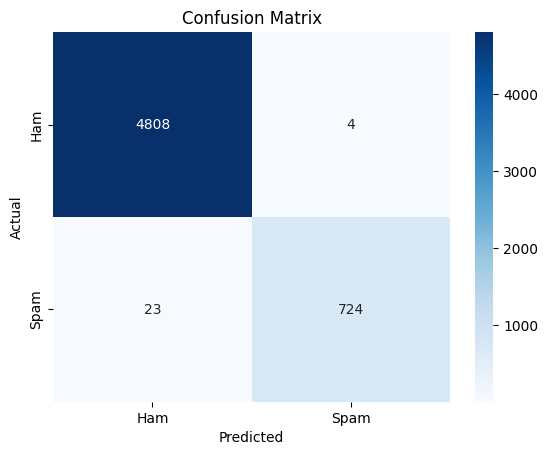

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(true_labels, predicted_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/5
56/56 [==============================] - 29s 499ms/step - loss: 0.0026 - accuracy: 0.9997 - val_loss: 0.0570 - val_accuracy: 0.9831
Epoch 2/5
56/56 [==============================] - 29s 514ms/step - loss: 0.0052 - accuracy: 0.9989 - val_loss: 0.0449 - val_accuracy: 0.9888
Epoch 3/5
56/56 [==============================] - 27s 482ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0501 - val_accuracy: 0.9876
Epoch 4/5
56/56 [==============================] - 27s 480ms/step - loss: 5.8418e-04 - accuracy: 0.9997 - val_loss: 0.0529 - val_accuracy: 0.9888
Epoch 5/5
56/56 [==============================] - 28s 502ms/step - loss: 3.3426e-04 - accuracy: 1.0000 - val_loss: 0.0485 - val_accuracy: 0.9888
Epoch 1/5
56/56 [==============================] - 27s 477ms/step - loss: 2.0239e-04 - accuracy: 1.0000 - val_loss: 0.0552 - val_accuracy: 0.9888
Epoch 2/5
56/56 [==============================] - 28s 492ms/step - loss: 1.4116e-04 - accuracy: 1.0000 - val_loss: 0.0556 - val_accurac

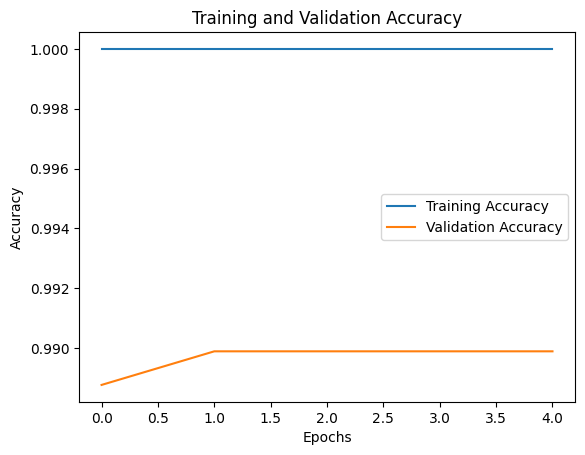

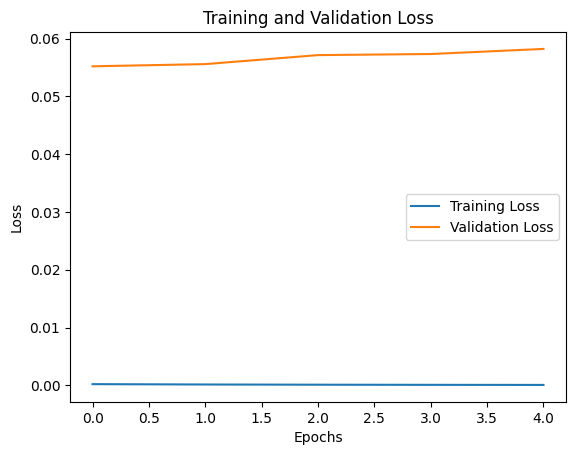

In [ ]:
model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

# Accessing accuracy and loss from history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting accuracy
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotting loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss*100},\nTest Accuracy: {accuracy*100}")

28/28 [==============================] - 3s 91ms/step - loss: 0.0582 - accuracy: 0.9899
Test Loss: 5.82309290766716,
Test Accuracy: 98.98876547813416


In [ ]:
import pandas as pd
from sklearn.metrics import precision_recall_fscore_support
from tensorflow.keras.models import load_model

# Load the model
model = load_model('sms_model.h5')

# Make predictions
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# Compute precision, recall, F1-score, and support
precision, recall, f1score, support = precision_recall_fscore_support(y_test, y_pred_binary)

# Create a DataFrame for the metrics
metrics_df = pd.DataFrame({
    'Class': ['Ham', 'Spam'],
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1score,
    'Support': support
})

# Print the DataFrame
print(metrics_df)


28/28 [==============================] - 5s 152ms/step
  Class  Precision    Recall  F1-Score  Support
0   Ham   0.988342  1.000000  0.994137      763
1  Spam   1.000000  0.929134  0.963265      127
